### 산탄데르 고객 만족 예측

## 데이터 전처리

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import warnings

warnings.filterwarnings('ignore')

cust_df = pd.read_csv('train_santander.csv', encoding = 'latin-1')
print('dataset shape:' , cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [8]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [9]:
#만족과 불만족 비율 살펴보기
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

TARGET
0    73012
1     3008
Name: count, dtype: int64
unsatisfied 비율은 0.04


In [10]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [11]:
#var3 칼럼의 min값이 -99999인데 NaN이나 예외값을 -99999로 변환했을 것
#-99999를 가장 값이 많은 2로 변환
#ID피처는 드롭
#클래스 데이터셋과 피처 데이터셋을 분리해 별도의 데이터셋으로 저장
cust_df['var3'].replace(-99999, 2, inplace = True)
cust_df.drop('ID', axis = 1, inplace = True)

X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 369)


In [14]:
#원본 데이터셋에서 학습/테스트 데이터셋 분리
#비대칭한 데이터셋이므로 Target값 분포도가 학습 데이터셋과 테스트 데이터셋에 모두 비슷하게 추출됐는지 확인
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size= 0.2, random_state = 0)

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 shape: {0}, 테스트 세트 shape: {1}'.format(X_train.shape, X_test.shape))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts() / train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts() / test_cnt)

#둘 다 원본과 유사하게 전체 데이터셋의 4%정도의 불만족값을 가지도록 만들어짐

학습 세트 shape: (60816, 369), 테스트 세트 shape: (15204, 369)
학습 세트 레이블 값 분포 비율
TARGET
0    0.960964
1    0.039036
Name: count, dtype: float64

 테스트 세트 레이블 값 분포 비율
TARGET
0    0.9583
1    0.0417
Name: count, dtype: float64


In [15]:
#X_train, y_train을 다시 학습과 검증 데이터셋으로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = 0)

## XGBoost 모델 학습과 하이퍼 파라미터 튜닝

In [38]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

#n_estimators는 500으로, random_state는 예제 수행 시마다 동일 예측 결과를 위해 설정
xgb_clf = XGBClassifier(n_estimators = 500, learning_rate = 0.05, random_state = 156)

#성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds = 100, eval_metric = 'auc', eval_set = [ (X_tr, y_tr), (X_val, y_val) ], verbose = False)

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

ROC AUC: 0.8430


In [17]:
#hyperopt를 이용한 베이지안 최적화 기반으로 XGBoost 하이퍼 파라미터 튜닝 수행
from hyperopt import hp

# max_depth는 5에서 15까지 1간격, min_child_weight는 1에서 6까지 1간격
# colsample_bytree는 0.5에서 0.95사이, learning_rate는 0.01에서 0.2사이 정규분포된 값으로 탐색

xgb_search_space = {'max_depth':hp.quniform('max_depth', 5,15,1),
                    'min_child_weight':hp.quniform('min_child_weight', 1,6,1),
                    'colsample_bytree':hp.uniform('colsample_bytree', 0.5, 0.95),
                    'learning_rate':hp.uniform('learning_rate',0.01, 0.2)}

In [39]:
#목적 함수 생성
# 3 fold 교차검증을 이용해 평균 ROC-AUC값을 반환하되 -1을 곱해주어 최댓값이 최솟값이 되도록 반환
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

#fmin()호출 시 search_space 값으로 XGBClassifier 교차 검증 학습 후 -1 * roc_auc 평균 값을 반환
def objective_func(search_space):
    xgb_clf = XGBClassifier(n_estimators = 100, max_depth = int(search_space['max_depth']),
                            min_child_weight = int(search_space['min_child_weight']),
                            colsample_bytree = search_space['colsample_bytree'],
                            learning_rate = search_space['learning_rate'])

    # 3개 KFold방식으로 평가된 roc-auc지표를 담는 리스트
    roc_auc_list = []
    
    # 3개 kfold 방식 적용
    kf = KFold(n_splits = 3)
    # X_train을 다시 학습용, 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터셋 분리
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
    
        #early stopping은 30회, 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행
        xgb_clf.fit(X_tr, y_tr, early_stopping_rounds = 30, eval_metric = 'auc',
        eval_set = [ (X_tr, y_tr), (X_val, y_val) ], verbose = False )
    
        #1로 예측한 확률값 추출 후 roc auc 계산하고 평균 roc auc 계산을 위해 리스트에 결괏값 담음
        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)
    
    # 3개 kfold로 계산된 평균값을 반환하되
    #hyperopt는 목적함수의 최솟값을 위한 입력값을 찾으므로  -1을 곱한 뒤 반환
    return -1 * np.mean(roc_auc_list)

In [40]:
#fmin()함수를 호출해 max_eval = 50회 만큼 반복하며 최적의 하이퍼 파라미터 도출
from hyperopt import fmin, tpe, Trials
trials = Trials()

#fmin()함수를 호출, max_evals 지정된 횟수만큼 반복 후 목적함수의 최솟값을 가지는 최적 입력값 추출
best = fmin(fn = objective_func,
            space = xgb_search_space,
            algo = tpe.suggest,
            max_evals = 50,
            trials = trials, rstate = np.random.default_rng(seed = 30))
print('best:', best)

  0%|                                                                           | 0/50 [00:13<?, ?trial/s, best loss=?]


KeyboardInterrupt: 

In [ ]:
#n_estimators를 500 증가 후 최적으로 찾은 하이퍼 파라미터를 기반으로 학습과 예측 수행
xgb_clf = XGBClassifier(n_estimators = 500, learning_rate = round(best['learning_rate'], 5),
                        max_depth = int(best['max_depth']),
                        min_child_weight = int(best['min_child_weight']),
                        colsample_bytree = round(best['colsample_bytree'], 5))

#evaluation metric을 auc로, early stopping은 100으로 설정하고 학습 수행
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds = 100,
            eval_metric = 'auc', eval_set = [ (X_tr, y_tr), (X_val, y_val) ] )
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

NotFittedError: need to call fit or load_model beforehand

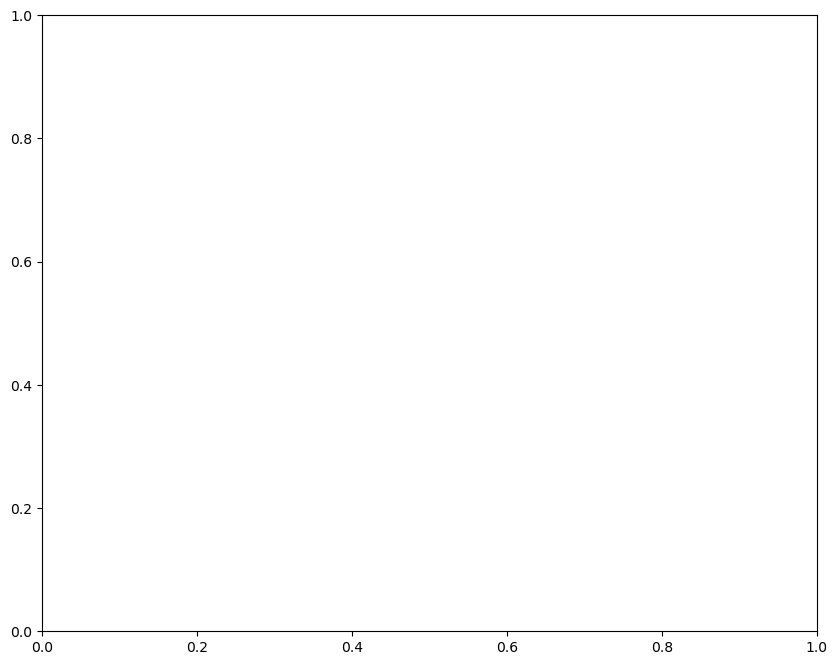

In [24]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize = (10,8))
plot_importance(xgb_clf, ax = ax, max_num_features = 20, height = 0.4)

## LightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [41]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators = 500)

eval_set = [ (X_tr, y_tr), (X_val, y_val) ]

lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds = 50, eval_metric = 'auc', eval_set = eval_set, verbose = False)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

ROC AUC: 0.8390


In [20]:
lgbm_search_space = {'num_leaves':hp.quniform('num_leaves', 32,64,1),
                     'max_depth':hp.quniform('max_depth',100,160,1),
                     'min_child_samples':hp.quniform('min_child_samples',60,100,1),
                     'subsample':hp.uniform('subsample',0.7,1),
                     'learning_rate':hp.uniform('learning_rate',0.01,0.2)}

In [42]:
def objective_func(search_space):
    lgbm_clf = LGBMClassifier(n_estimators = 100,
                              num_leaves = int(search_space['num_leaves']),
                              max_depth = int(search_space['max_depth']),
                              min_child_samples = int(search_space['min_child_samples']),
                              subsample = search_space['subsample'],
                              learning_rate = search_space['learning_rate'])

    #3개 kfold 방식으로 평가된 roc auc 지표를 담는 리스트
    roc_auc_list = []

    #3개 kfold 방식 적용
    kf = KFold(n_splits = 3)
    #X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

        #early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행
        lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds = 30, eval_metric = 'auc', eval_set = [ (X_tr, y_tr), (X_val, y_val) ], verbose = False)
    
        #1로 예측한 확률값 추출 후 roc auc 계산하고 평균 roc auc 계산을 위해 리스트에 더함
        score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)

    #3개 k-fold로 계산된 roc auc 값의 평균값을 반환하되
    #hyperopt는 목적함수의 최솟값을 위한 입력값을 찾으므로 -1을 곱함
    return -1*np.mean(roc_auc_list)

In [43]:
#fmin()을 호출하여 최적 하이퍼 파라미터 도출
from hyperopt import fmin, tpe, Trials

trials = Trials()

#fmin() 함수를 호출, max_evals 지정된 횟수만큼 반복 후 목적함수의 최솟값을 가지는 최적 입력값 추출
best = fmin(fn = objective_func, space = lgbm_search_space, algo = tpe.suggest,
            max_evals = 50, trials = trials, rstate = np.random.default_rng(seed = 30))
print('best:' ,best)

100%|███████████████████████████████████████████████| 50/50 [01:36<00:00,  1.93s/trial, best loss: -0.8361288241572259]
best: {'learning_rate': 0.04787723629063769, 'max_depth': 121.0, 'min_child_samples': 83.0, 'num_leaves': 36.0, 'subsample': 0.7058957246886406}


In [46]:
lgbm_clf = LGBMClassifier(n_estimators = 500, num_leaves = int(best['num_leaves']),
                          max_depth = int(best['max_depth']),
                          min_child_samples = int(best['min_child_samples']),
                          subsample = round(best['subsample'], 5),
                          learning_rate = round(best['learning_rate'], 5))

#evaluation metric을 auc로, early stopping은 100으로 설정하고 학습 수행
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds = 100,
             eval_metric = 'auc', eval_set = [ (X_tr, y_tr), (X_val, y_val) ], verbose = False)
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC Score: {0:.4f}'.format(lgbm_roc_score))

ROC AUC Score: 0.8414
